In [96]:
%matplotlib inline


import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from scipy.stats import pearsonr

In [46]:
df=pd.read_csv('combined.csv')
# Delete Text Columns
del df['Q5_TEXT'];
del df['Q8_TEXT'];
del df['Q13_TEXT'];
del df['Q28_TEXT'];

# Also remove Q11 column - H1AC Reporting.
del df['Q11']

# Remove missing data cols.
df=df.drop(df.index[[14,16,17,29,39,48]])

# Fill missing/na values.
df=df.fillna(df.median())

In [59]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9,Q10,Q12,...,Q27_3,Q27_4,Q27_5,Q27_6,Q27_7,Q32_1,Q32_2,Q32_3,Q32_4,Q28
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,56.478261,1.652174,3.869565,1.717391,3.869565,3.630435,1.608696,17.358696,1.347826,1.478261,...,6.195652,5.021739,3.978261,7.586957,6.369565,4.500000,3.130435,8.108696,8.130435,1.065217
std,13.129677,0.481543,1.499758,1.258977,1.820973,1.651379,0.714244,14.360696,0.481543,0.690865,...,1.927803,2.462962,2.832267,1.309386,2.862467,3.074989,2.940965,1.608702,1.881001,0.249637
min,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,50.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,1.000000,...,5.000000,3.000000,1.000000,8.000000,5.750000,1.000000,1.000000,8.000000,8.000000,1.000000
50%,59.000000,2.000000,4.000000,1.000000,5.000000,5.000000,2.000000,12.000000,1.000000,1.000000,...,7.000000,5.000000,4.000000,8.000000,8.000000,4.000000,1.000000,8.000000,9.000000,1.000000
75%,65.750000,2.000000,5.000000,2.000000,5.000000,5.000000,2.000000,29.500000,2.000000,2.000000,...,8.000000,7.750000,6.750000,8.000000,8.000000,8.000000,5.000000,9.000000,9.000000,1.000000
max,75.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.000000,53.500000,2.000000,4.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,9.000000,2.000000


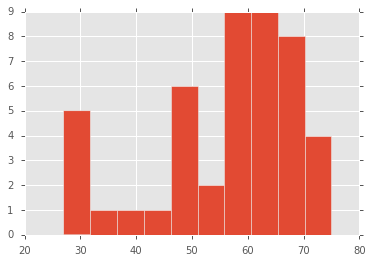

In [79]:
# Plot Age Histogram
plt.hist(df['Q1'])
plt.grid(True)
plt.show()

In [87]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q8', 'Q9', 'Q10', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19_1', 'Q19_2', 'Q19_3', 'Q19_4',
       'Q19_5', 'Q19_6', 'Q20_1', 'Q20_2', 'Q20_3', 'Q20_4', 'Q20_5', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27_1', 'Q27_2', 'Q27_3', 'Q27_4',
       'Q27_5', 'Q27_6', 'Q27_7', 'Q32_1', 'Q32_2', 'Q32_3', 'Q32_4', 'Q28'],
      dtype='object')

In [89]:
df1=df[['Q19_1', 'Q19_2', 'Q19_3', 'Q19_4',
       'Q19_5', 'Q19_6', 'Q20_1', 'Q20_2', 'Q20_3', 'Q20_4', 'Q20_5']]

In [94]:
df1[df1<3.0]=0;
df1[df1>=3.0]=1;

/home/arun/thirdparty/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/arun/thirdparty/miniconda3/lib/python3.5/site-packages/pandas/core/frame.py:2383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.where(-key, value, inplace=True)
/home/arun/thirdparty/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [95]:
df1

,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [100]:
pearsonr(df1['Q19_1'],df1['Q19_4'])

(0.44135833302489197, 0.0021377489502779437)